In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-wind-speed.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_relative_humidity,mean_air_temperature,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_wind_speed
0,Jan-10,90.0,67,16.8,28,92.7,9.1,5.0
1,Feb-10,276.5,77,18.3,22,69.5,9.2,5.6
2,Mar-10,41.5,71,19.9,36,134.9,14.2,5.8
3,Apr-10,219.0,76,21.2,21,81.3,13.4,5.4
4,May-10,574.5,79,23.8,27,111.8,14.8,5.1


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.1302559779546001


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[5.23525223 5.37796221 5.01485209 5.15932038 5.72783868 5.10556883
 5.42481962 5.34558531 5.23529003 5.60668145 5.40613373 5.27281358
 5.31959232 5.05924431 5.00760444 4.97450992 5.29887145 5.11459201
 5.09190313 5.64034236 4.99748827 5.39173554 5.58425214 5.32476787
 5.34699583 5.17626488 5.04769048 5.38676066 5.21997744 5.39062839
 5.13656239 5.93192812 5.37044728 5.21606857 5.40833284 5.35208766
 5.261493   5.02067305 5.16220352 5.17462536 5.67221488 4.95715458
 5.0117281  5.30277622 5.20117658 5.41430925 5.29685739 5.37077585
 5.22007355 5.2263768  5.20846543 4.93695984 5.35493256 5.42530585
 5.65838882 5.32417437 5.10677923 5.51007722 5.17596327 5.36237003
 5.2204022  4.96717508 5.0448865  4.99406271 5.10806001 4.90441513
 5.4774332  5.35057158 4.98600485 5.1884324  5.23706841 5.30686388
 5.55833799 5.21514716 5.21286508 5.25072344 5.01822864 5.37840784
 5.25270287 5.37161075 5.45337647 5.21126279 5.29027114 5.26765558
 5.30324668 5.09592785 5.11297521 4.95049

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.38218726510745943
Mean Squared Error: 0.25447200112787904
Root Mean Squared Error: 0.5044521792280008


Text(0.5, 1.0, 'Mean wind speed - actual and predicted values')

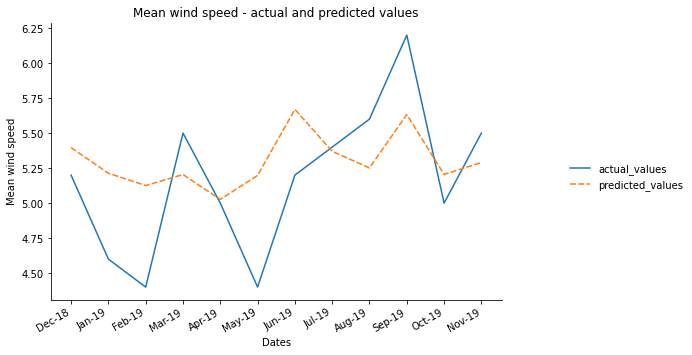

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean wind speed') #set the label for the y-axis
plt.title('Mean wind speed - actual and predicted values') #set the title of the graph